In [38]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [39]:
 #sklearn preproc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
data_index=pd.read_csv('../raw_data/out_csv/index_UK.csv')

In [53]:
data_indicator=pd.read_csv('../raw_data/out_csv/indicator_UK.csv')

In [54]:
data_indicator=data_indicator.set_index('date')

In [55]:
data_indicator.head()

,cancel_public_events,school_closing,restrictions_on_gathering,close_public_transport,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt/contract_relief,public_information_campaigns,...,protection_of_elderly_people,total_cases,new_cases,total_deaths,new_deaths,workplace_closing,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,10.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,88.0,78.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
data_indicator.head()

,cancel_public_events,school_closing,restrictions_on_gathering,close_public_transport,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt/contract_relief,public_information_campaigns,...,protection_of_elderly_people,total_cases,new_cases,total_deaths,new_deaths,workplace_closing,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,10.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,88.0,78.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
data_indicator.columns

Index(['cancel_public_events', 'school_closing', 'restrictions_on_gathering',
       'close_public_transport', 'stay_at_home_requirements',
       'restrictions_on_internal_movement', 'international_travel_controls',
       'income_support', 'debt/contract_relief',
       'public_information_campaigns', 'testing_policy', 'contact_tracing',
       'facial_coverings', 'vaccination_policy',
       'protection_of_elderly_people', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'workplace_closing', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters'],
      dtype='object')

In [58]:
X=data_indicator.drop(columns=['total_deaths','new_deaths'])

In [59]:
X.head()

,cancel_public_events,school_closing,restrictions_on_gathering,close_public_transport,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt/contract_relief,public_information_campaigns,...,facial_coverings,vaccination_policy,protection_of_elderly_people,total_cases,new_cases,workplace_closing,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,88.0,78.0,0.0,0.0,0.0,0.0,0.0


In [60]:
y=data_indicator['total_deaths']
y

date
2020-01-30         1.0
2020-01-31         1.0
2020-02-01         1.0
2020-02-02         2.0
2020-02-03         2.0
                ...   
2022-09-02    205288.0
2022-09-03    205288.0
2022-09-04    205288.0
2022-09-05    205288.0
2022-09-06    205288.0
Name: total_deaths, Length: 951, dtype: float64

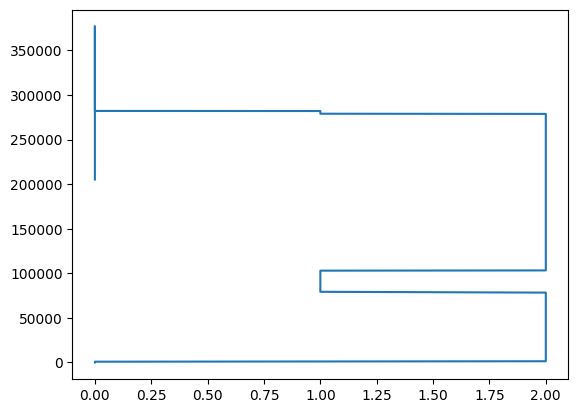

In [61]:
#plt.plot(X['cancel_public_events'],y)
#plt.plot(X['close_public_transport'],y)
plt.plot(X['international_travel_controls'],y)

<AxesSubplot:>

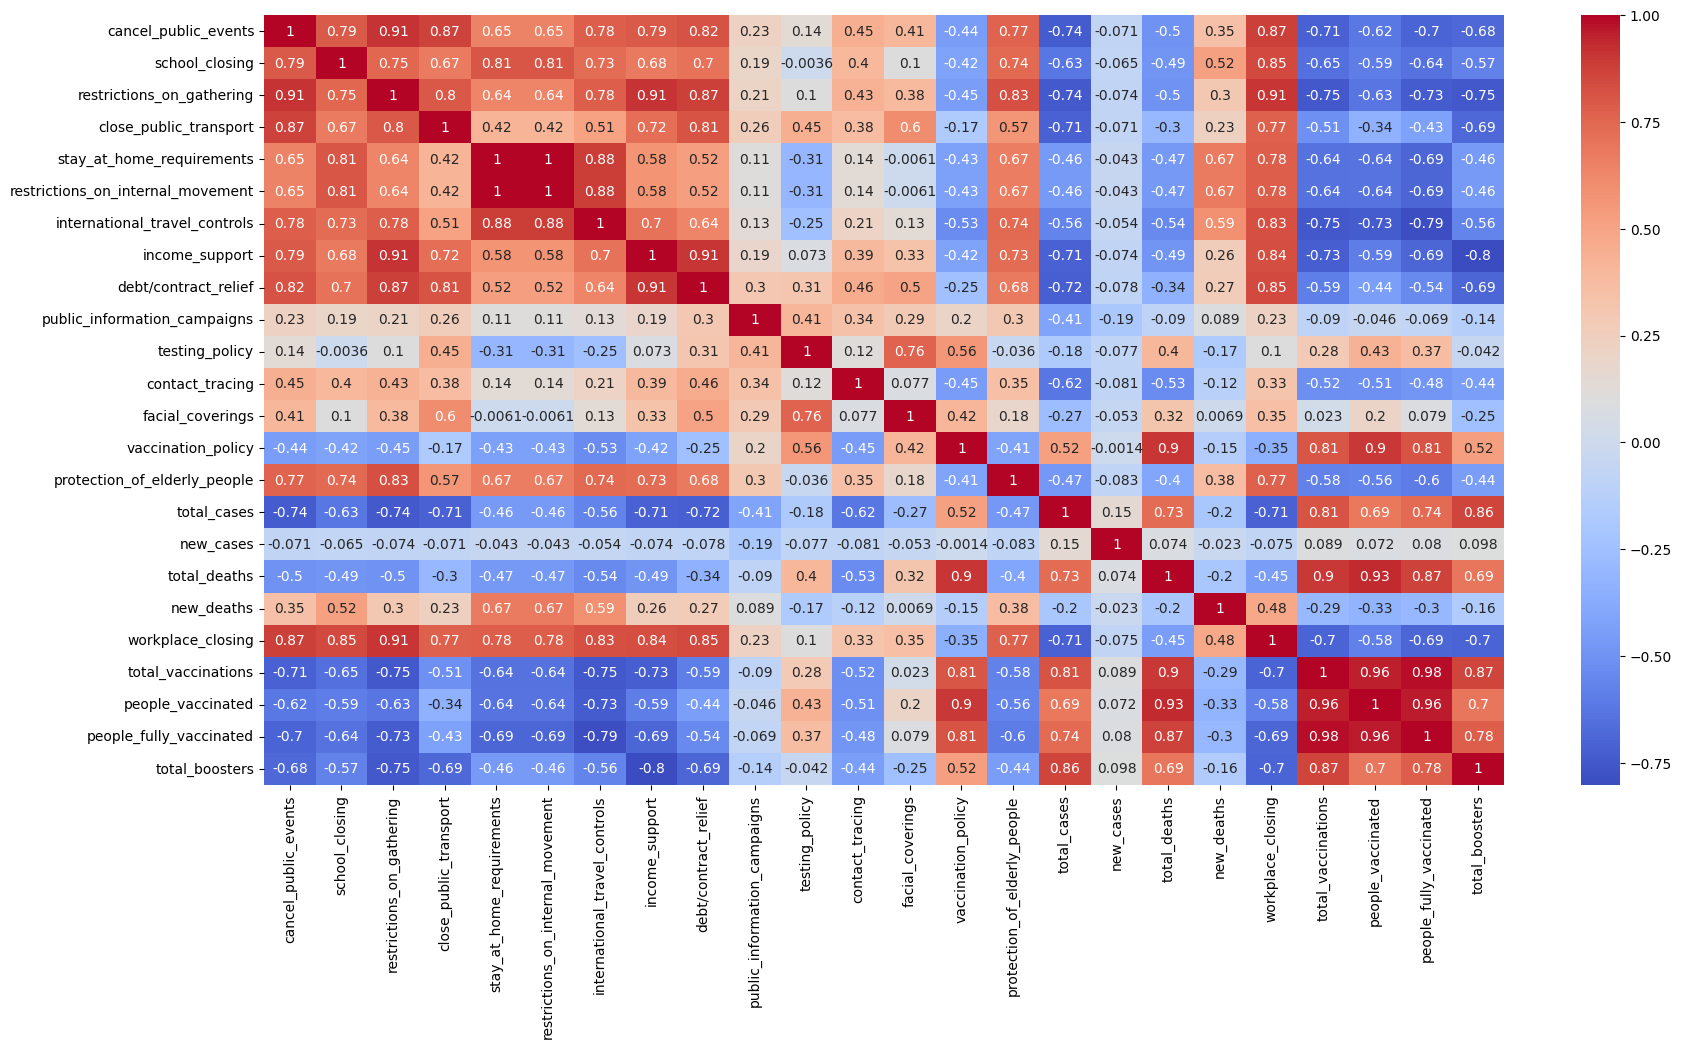

In [62]:
plt.figure(figsize = (20,10))

sns.heatmap(data_indicator.corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})